In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

import random
import numpy as np
import torch

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
import numpy as np
import time

from torch.utils.data import Dataset, DataLoader, random_split


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Using device: cuda


In [2]:
# # Manual FASTA parsing (without Biopython)
# fasta_path = "../data//naturalAMPs_APD2024a-ADAM.fasta.txt"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/naturalAMPs_APD2024a-ADAM.csv", index=False)


# Manual FASTA parsing (without Biopython)
# fasta_path = "../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta.csv", index=False)



# fasta_path = "../data/uniprotkb_length_5_TO_30_NOT_antimicrob_2025_04_14.fasta (1)"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta1.csv", index=False)

## Data

In [3]:
adam_df = pd.read_csv("../data/naturalAMPs_APD2024a-ADAM.csv")
uniprot_df = pd.read_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta.csv")
uniprot_df1 = pd.read_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta1.csv")
uniprot_df = pd.concat([uniprot_df, uniprot_df1], ignore_index=True)

183 2
Range of sequence lengths: 181


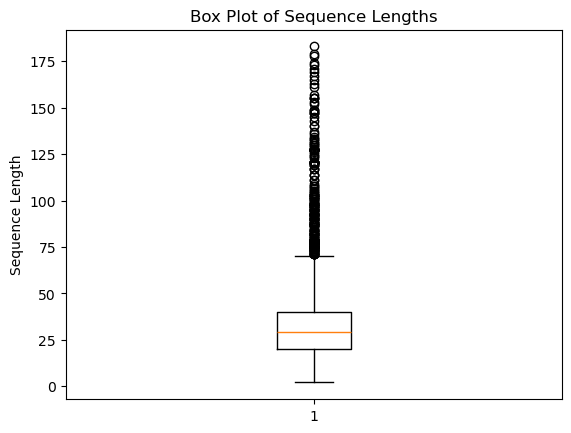

Mean sequence length: 34.4038112522686
Median sequence length: 29.0
Standard deviation of sequence lengths: 23.719451486351453


In [4]:
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = adam_df['Sequence'].apply(len)

# Calculate the range of sequence lengths
length_range = sequence_lengths.max() - sequence_lengths.min()
print(sequence_lengths.max(),sequence_lengths.min())
print(f"Range of sequence lengths: {length_range}")

# Draw a box plot
plt.boxplot(sequence_lengths)
plt.title("Box Plot of Sequence Lengths")
plt.ylabel("Sequence Length")
plt.show()

# Calculate and display distribution statistics
mean_length = sequence_lengths.mean()
median_length = sequence_lengths.median()
std_dev_length = sequence_lengths.std()

print(f"Mean sequence length: {mean_length}")
print(f"Median sequence length: {median_length}")
print(f"Standard deviation of sequence lengths: {std_dev_length}")

# adam_df = adam_df.drop(columns=['Sequence Length'])

/tmp/ipykernel_95341/3724575810.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_uniprot_df = uniprot_df.groupby('Sequence Length', group_keys=False).apply(


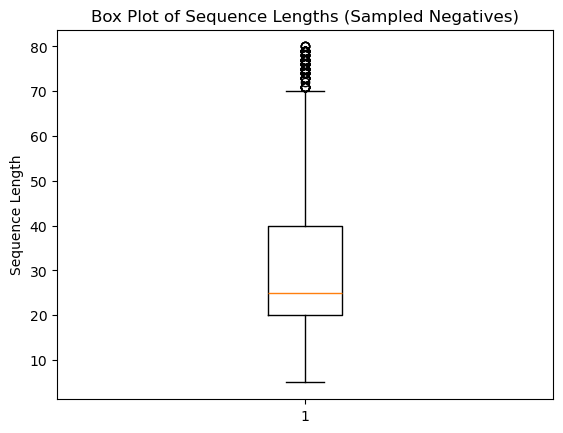

                                              Peptide ID  \
81192  sp|P12997|BIOB_CITFR Biotin synthase (Fragment...   
81715  sp|P85089|GTF2_LEUME Dextransucrase 2 (Fragmen...   
81193  sp|P13071|BIOA_CITFR Adenosylmethionine-8-amin...   
81176  sp|P0DKJ0|P160B_ARATH Peptide encoded by miPEP...   
81362  sp|P41853|FARP_ARTTR FMRFamide-like neuropepti...   
...                                                  ...   
52463  tr|F5P1Z5|F5P1Z5_SHIFL ATP synthase subunit c ...   
55078  sp|O28338|PURS_ARCFU Phosphoribosylformylglyci...   
26968  tr|A0A4D5YML7|A0A4D5YML7_9ROSI ATP synthase su...   
39606  tr|A0A7L3GVD8|A0A7L3GVD8_9PASS Serine palmitoy...   
30647  tr|A0A5C1DC31|A0A5C1DC31_9ANNE Cytochrome c ox...   

                                                Sequence  
81192                                              MAHSS  
81715                                              DSTNY  
81193                                              MTTDD  
81176                                      

In [5]:
# Calculate sequence lengths for uniprot_df
uniprot_df['Sequence Length'] = uniprot_df['Sequence'].apply(len)

# Calculate sequence lengths for adam_df
adam_df['Sequence Length'] = adam_df['Sequence'].apply(len)

# Perform stratified sampling to select more samples
sampled_uniprot_df = uniprot_df.groupby('Sequence Length', group_keys=False).apply(
    lambda x: x.sample(
        n=min(len(x), int(1.5 * adam_df['Sequence Length'].value_counts().get(x.name, 0))),  # Increase sample size
        random_state=42
    )
)

# Drop the 'Sequence Length' column after sampling
sampled_uniprot_df = sampled_uniprot_df.drop(columns=['Sequence Length'])
adam_df = adam_df.drop(columns=['Sequence Length'])

# Draw a box plot to visualize the distribution
plt.boxplot(sampled_uniprot_df['Sequence'].apply(len))
plt.title("Box Plot of Sequence Lengths (Sampled Negatives)")
plt.ylabel("Sequence Length")
plt.show()

print(sampled_uniprot_df)

### data organization

In [6]:

adam_df['label'] = 1
sampled_uniprot_df['label'] = 0
adam_df.columns = ["Peptide ID", "Sequences", 'label']
sampled_uniprot_df.columns = ["Peptide ID", "Sequences" , 'label']
df = pd.concat([adam_df, sampled_uniprot_df], ignore_index=True)

max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWYX")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")

# Filter out sequences containing non-standard amino acids
df = df[~df['Sequences'].str.contains('|'.join(non_standard_amino_acids))]
df = df.drop_duplicates(subset='Sequences')
tb_df = pd.read_csv('../data/all_seq702.csv')
df = df[~df['Sequences'].isin(tb_df['Sequences'])]

print(f"Number of sequences after filtering: {len(df)}")

X = df["Sequences"]
y = df["label"]

# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset




183
{'L', 'K', 'H', 'Y', 'Z', 'F', 'G', 'V', 'I', 'C', 'Q', 'W', 'T', 'X', 'D', 'A', 'E', 'R', 'S', 'N', 'P', 'B', 'M'}
23
{'B', 'Z'}
Number of 'B' values: 2
Number of sequences after filtering: 5592


### dataset

In [7]:

# Define One-Hot Encoding Function for DNA Sequences in PyTorch
def one_hot_torch(seq: str, dtype=torch.float32):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    seq_bytes = torch.ByteTensor(list(bytes(seq, "utf-8")))
    aa_bytes = torch.ByteTensor(list(bytes(amino_acids, "utf-8")))
    arr = torch.zeros(len(amino_acids), len(seq_bytes), dtype=dtype)
    for i, aa in enumerate(aa_bytes):
        arr[i, seq_bytes == aa] = 1
    return arr


class SequenceDataset(Dataset):
    def __init__(self, sequences, labels, one_hot_dtype=torch.float32):
        self.sequences = sequences
        self.labels = labels
        self.one_hot_dtype = one_hot_dtype

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences.iloc[idx]
        label = self.labels.iloc[idx]
        length = len(seq.replace("X", ""))  # unpadded length
        return one_hot_torch(seq, dtype=self.one_hot_dtype), torch.tensor(label, dtype=torch.float32), length

from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

def collate_and_pack(batch):
    # batch = list of (tensor_seq, label, length)
    sequences, labels, lengths = zip(*batch)

    # lengths as tensor
    lengths = torch.tensor(lengths)

    # Sort by descending length (required by pack_padded_sequence)
    sorted_indices = torch.argsort(lengths, descending=True)
    sequences = [sequences[i] for i in sorted_indices]
    labels = torch.tensor([labels[i] for i in sorted_indices])
    lengths = lengths[sorted_indices]

    # Stack to shape: (batch_size, 20, seq_len) and transpose for LSTM input
    # LSTM expects input of shape (seq_len, batch_size, features)
    sequences = [seq.T for seq in sequences]  # Transpose each [20, L] to [L, 20]
    padded_seqs = pad_sequence(sequences, batch_first=False)  # shape: [max_len, batch, features]

    # Pack the sequence
    packed_input = pack_padded_sequence(padded_seqs, lengths.cpu(), batch_first=False)

    return packed_input, labels


In [8]:
# Define DataLoaders

train_dataset = SequenceDataset(X_train, y_train)
val_dataset = SequenceDataset(X_val, y_val)
test_dataset = SequenceDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_and_pack)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

Dataset sizes:
Train: 3914
Validation: 839
Test: 839


## testing

In [103]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )

        # Classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        # packed_input: PackedSequence
        packed_output, (hn, cn) = self.lstm(packed_input)

        # hn: [num_layers, batch_size, hidden_dim]
        # We'll use the **last layer's** hidden state as feature
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Fully connected + sigmoid
        out = self.fc(last_hidden)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score

from torch.utils.tensorboard import SummaryWriter
import datetime

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = 1000.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    # Set up TensorBoard writer
    log_dir = f"runs/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)

        # Run evaluation
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device)

        # Logging
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")

        # Save to history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model.pt')

    writer.close()
    return history

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    # Convert predicted probabilities to binary predictions
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]

    # Metrics
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    # Confusion matrix
    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # handle corner cases

    # Sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        # Print metrics
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
        print(f"Specificity (Recall for Negative Class): {specificity:.4f}")

    return avg_loss, acc, auc


model = LSTMClassifier(hidden_dim=64)
history = train_model(model, train_loader, val_loader, num_epochs=10)


Epoch [1/10] - Train Loss: 0.6651, Val Loss: 0.6351, Val Acc: 0.6567, Val AUC: 0.8435


KeyboardInterrupt: 

### adding in regularization

In [ ]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  # L2 regularization

    best_val_loss = 1000.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    # Set up TensorBoard writer
    log_dir = f"runs/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)   
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)

        # Run evaluation
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        # Logging
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        print(f"Epoch [{epoch}/{num_epochs}] - "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Val Loss: {val_loss:.4f}, "
              f"Val Acc: {val_acc:.4f}, "
              f"Val AUC: {val_auc:.4f}")

        # Save to history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pt')

    writer.close()
    return history



from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    # Convert predicted probabilities to binary predictions
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]

    # Metrics
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    # Confusion matrix
    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # handle corner cases

    # Sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        # Print metrics
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
        print(f"Specificity (Recall for Negative Class): {specificity:.4f}")

    return avg_loss, acc, auc

model = LSTMClassifier(input_dim=20, hidden_dim=64, dropout=0.5)
history = train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3,
                      weight_decay=1e-4, verbose=True)



Confusion Matrix:
[[401 160]
 [ 89 407]]
Sensitivity (Recall for Positive Class): 0.8206
Specificity (Recall for Negative Class): 0.7148
Epoch [1/10] - Train Loss: 0.6630, Val Loss: 0.5471, Val Acc: 0.7644, Val AUC: 0.8299

Confusion Matrix:
[[460 101]
 [101 395]]
Sensitivity (Recall for Positive Class): 0.7964
Specificity (Recall for Negative Class): 0.8200
Epoch [2/10] - Train Loss: 0.5161, Val Loss: 0.4849, Val Acc: 0.8089, Val AUC: 0.8625

Confusion Matrix:
[[192 369]
 [ 29 467]]
Sensitivity (Recall for Positive Class): 0.9415
Specificity (Recall for Negative Class): 0.3422
Epoch [3/10] - Train Loss: 0.6564, Val Loss: 0.6466, Val Acc: 0.6235, Val AUC: 0.8047

Confusion Matrix:
[[424 137]
 [119 377]]
Sensitivity (Recall for Positive Class): 0.7601
Specificity (Recall for Negative Class): 0.7558
Epoch [4/10] - Train Loss: 0.5960, Val Loss: 0.5372, Val Acc: 0.7578, Val AUC: 0.8364

Confusion Matrix:
[[458 103]
 [ 77 419]]
Sensitivity (Recall for Positive Class): 0.8448
Specificity (R

## Modelling on general AMP data (bayesian optimization)

### LSTM

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime


class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)
        last_hidden = hn[-1]
        dropped = self.dropout(last_hidden)
        out = self.fc(dropped)
        out = self.sigmoid(out).squeeze(1)
        return out


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    # if not train:
    #     model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm_.pt')

    writer.close()
    return best_val_loss



def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)

    model = LSTMClassifier(input_dim=20, hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout)
    val_auc = train_model(model, train_loader, val_loader, num_epochs=20, lr=lr,
                          weight_decay=weight_decay, verbose=False, train=True)
    return val_auc


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_trial.params)
lstm_best_param = study.best_trial.params

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-23 18:36:53,270] A new study created in memory with name: no-name-8e9d8653-f6fb-4fc8-a872-a8c63cd07d19
[I 2025-04-23 18:37:59,180] Trial 0 finished with value: 0.3562810772231647 and parameters: {'hidden_dim': 87, 'num_layers': 1, 'dropout': 0.16245952171507475, 'lr': 0.006420442460121685, 'weight_decay': 0.0047193694355770095}. Best is trial 0 with value: 0.3562810772231647.
[I 2025-04-23 18:39:32,808] Trial 1 finished with value: 0.6769623926707676 and parameters: {'hidden_dim': 73, 'num_layers': 3, 'dropout': 0.18122954970186447, 'lr': 0.00764397073778798, 'weight_decay': 0.004415837749229311}. Best is trial 0 with value: 0.3562810772231647.
[I 2025-04-23 18:40:48,483] Trial 2 finished with value: 0

Best hyperparameters: {'hidden_dim': 127, 'num_layers': 1, 'dropout': 0.10245101789054618, 'lr': 0.002820964179045024, 'weight_decay': 2.4839993944027442e-05}


#### testing

In [12]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout= lstm_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_best_param['lr'],
                      weight_decay=lstm_best_param['weight_decay'], verbose=True, train=False)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

torch.save(model.state_dict(), 'best_model_lstm_1.pt')

Epoch [1/20] - Train Loss: 0.6633, Val Loss: 0.5787, Val Acc: 0.6722, Val AUC: 0.8321
Epoch [2/20] - Train Loss: 0.5102, Val Loss: 0.3905, Val Acc: 0.8308, Val AUC: 0.9070
Epoch [3/20] - Train Loss: 0.4257, Val Loss: 0.4158, Val Acc: 0.8129, Val AUC: 0.9067
Epoch [4/20] - Train Loss: 0.4490, Val Loss: 0.4154, Val Acc: 0.8153, Val AUC: 0.9019
Epoch [5/20] - Train Loss: 0.4474, Val Loss: 0.4681, Val Acc: 0.7807, Val AUC: 0.8558
Epoch [6/20] - Train Loss: 0.4793, Val Loss: 0.5048, Val Acc: 0.7282, Val AUC: 0.8241
Epoch [7/20] - Train Loss: 0.5639, Val Loss: 0.5802, Val Acc: 0.6544, Val AUC: 0.7682
Epoch [8/20] - Train Loss: 0.5398, Val Loss: 0.4760, Val Acc: 0.7628, Val AUC: 0.8597
Epoch [9/20] - Train Loss: 0.5335, Val Loss: 0.5166, Val Acc: 0.7402, Val AUC: 0.8340
Epoch [10/20] - Train Loss: 0.4375, Val Loss: 0.3372, Val Acc: 0.8582, Val AUC: 0.9252
Epoch [11/20] - Train Loss: 0.3348, Val Loss: 0.3238, Val Acc: 0.8558, Val AUC: 0.9442
Epoch [12/20] - Train Loss: 0.3087, Val Loss: 0.3027

### biLSTM

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# Updated BiLSTM with flatten layer as previously defined
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_flatten/BiLSTM_Flatten_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-bilstm.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)
    max_seq_len = 100  # fixed for now; match your padding/truncation

    model = BiLSTMWithFlattenClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout,
        max_seq_len=max_seq_len
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

# Usage (uncomment and run in your local environment):
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_best_param = study.best_trial.params

[I 2025-04-23 14:27:52,255] A new study created in memory with name: no-name-9241524f-ae80-4dac-ba31-6f42f8b67913
[I 2025-04-23 14:28:13,775] Trial 0 finished with value: 0.2386869029807193 and parameters: {'hidden_dim': 68, 'num_layers': 1, 'dropout': 0.195687961309635, 'lr': 0.007300367989080572, 'weight_decay': 0.0011771003251049882}. Best is trial 0 with value: 0.2386869029807193.
[I 2025-04-23 14:28:35,647] Trial 1 finished with value: 0.27903481466429575 and parameters: {'hidden_dim': 127, 'num_layers': 1, 'dropout': 0.4715352238716358, 'lr': 0.0025030040661374775, 'weight_decay': 0.006317832689759742}. Best is trial 0 with value: 0.2386869029807193.
[I 2025-04-23 14:29:01,929] Trial 2 finished with value: 0.677487850189209 and parameters: {'hidden_dim': 122, 'num_layers': 3, 'dropout': 0.19804916387652308, 'lr': 0.005548039942523586, 'weight_decay': 0.009854436320957755}. Best is trial 0 with value: 0.2386869029807193.
[I 2025-04-23 14:29:28,533] Trial 3 finished with value: 0.2

Best hyperparameters: {'hidden_dim': 36, 'num_layers': 2, 'dropout': 0.14356648631040383, 'lr': 0.009777068595997298, 'weight_decay': 5.114978782425517e-05}


In [29]:
bilstm_best_param

{'hidden_dim': 36,
 'num_layers': 2,
 'dropout': 0.14356648631040383,
 'lr': 0.009777068595997298,
 'weight_decay': 5.114978782425517e-05}

In [30]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout= bilstm_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=30, lr=bilstm_best_param['lr'],
                      weight_decay=bilstm_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Confusion Matrix:
[[298  53]
 [117 371]]
Sensitivity: 0.7602, Specificity: 0.8490
Epoch [1/30] - Train Loss: 0.5787, Val Loss: 0.4530, Val Acc: 0.7974, Val AUC: 0.8136

Confusion Matrix:
[[273  78]
 [ 61 427]]
Sensitivity: 0.8750, Specificity: 0.7778
Epoch [2/30] - Train Loss: 0.4419, Val Loss: 0.3902, Val Acc: 0.8343, Val AUC: 0.9035

Confusion Matrix:
[[329  22]
 [183 305]]
Sensitivity: 0.6250, Specificity: 0.9373
Epoch [3/30] - Train Loss: 0.4235, Val Loss: 0.5083, Val Acc: 0.7557, Val AUC: 0.8566

Confusion Matrix:
[[252  99]
 [ 47 441]]
Sensitivity: 0.9037, Specificity: 0.7179
Epoch [4/30] - Train Loss: 0.4779, Val Loss: 0.4072, Val Acc: 0.8260, Val AUC: 0.9010

Confusion Matrix:
[[235 116]
 [ 26 462]]
Sensitivity: 0.9467, Specificity: 0.6695
Epoch [5/30] - Train Loss: 0.3923, Val Loss: 0.3377, Val Acc: 0.8308, Val AUC: 0.9179

Confusion Matrix:
[[226 125]
 [ 12 476]]
Sensitivity: 0.9754, Specificity: 0.6439
Epoch [6/30] - Train Loss: 0.3744, Val Loss: 0.3504, Val Acc: 0.8367, Va

### lstm + attention

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# LSTM with Attention classifier
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)  # shape: [batch, seq_len, hidden_dim]

        # Compute attention weights
        attn_weights = self.attn(lstm_out).squeeze(-1)  # shape: [batch, seq_len]
        attn_weights = torch.softmax(attn_weights, dim=1)  # normalize
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)  # shape: [batch, hidden_dim]

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm-attn/LSTM_Attn_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-lstm_attention.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

# Usage
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_attn_best_param = study.best_trial.params

[I 2025-04-23 14:41:04,620] A new study created in memory with name: no-name-6fbfc53a-2304-4daf-b466-d4fabb7cbf7c
[I 2025-04-23 14:41:26,468] Trial 0 finished with value: 0.6771370938846043 and parameters: {'hidden_dim': 57, 'num_layers': 3, 'dropout': 0.2719621858583795, 'lr': 0.003919503099491344, 'weight_decay': 0.0026719207449166817}. Best is trial 0 with value: 0.6771370938846043.
[I 2025-04-23 14:41:47,553] Trial 1 finished with value: 0.4312099292874336 and parameters: {'hidden_dim': 122, 'num_layers': 1, 'dropout': 0.11849876281251306, 'lr': 0.0019139454061706763, 'weight_decay': 0.0003071268093830577}. Best is trial 1 with value: 0.4312099292874336.
[I 2025-04-23 14:42:13,152] Trial 2 finished with value: 0.5884787525449481 and parameters: {'hidden_dim': 92, 'num_layers': 1, 'dropout': 0.3782604877763943, 'lr': 0.00021246116322917881, 'weight_decay': 5.605650659026732e-06}. Best is trial 1 with value: 0.4312099292874336.
[I 2025-04-23 14:42:35,870] Trial 3 finished with value:

Best hyperparameters: {'hidden_dim': 117, 'num_layers': 2, 'dropout': 0.1810060705619591, 'lr': 0.0004398244190274676, 'weight_decay': 1.115749024063186e-06}


In [32]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_attn_best_param['hidden_dim'], num_layers=lstm_attn_best_param['num_layers'], dropout= lstm_attn_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_attn_best_param['lr'],
                      weight_decay=lstm_attn_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Confusion Matrix:
[[  0 351]
 [  0 488]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [1/20] - Train Loss: 0.6748, Val Loss: 0.6454, Val Acc: 0.5816, Val AUC: 0.8303

Confusion Matrix:
[[228 123]
 [ 54 434]]
Sensitivity: 0.8893, Specificity: 0.6496
Epoch [2/20] - Train Loss: 0.5463, Val Loss: 0.4461, Val Acc: 0.7890, Val AUC: 0.8692

Confusion Matrix:
[[254  97]
 [ 50 438]]
Sensitivity: 0.8975, Specificity: 0.7236
Epoch [3/20] - Train Loss: 0.4448, Val Loss: 0.4133, Val Acc: 0.8248, Val AUC: 0.8816

Confusion Matrix:
[[281  70]
 [ 66 422]]
Sensitivity: 0.8648, Specificity: 0.8006
Epoch [4/20] - Train Loss: 0.4158, Val Loss: 0.3833, Val Acc: 0.8379, Val AUC: 0.8956

Confusion Matrix:
[[301  50]
 [103 385]]
Sensitivity: 0.7889, Specificity: 0.8575
Epoch [5/20] - Train Loss: 0.4005, Val Loss: 0.4049, Val Acc: 0.8176, Val AUC: 0.9009

Confusion Matrix:
[[206 145]
 [ 20 468]]
Sensitivity: 0.9590, Specificity: 0.5869
Epoch [6/20] - Train Loss: 0.4259, Val Loss: 0.4279, Val Acc: 0.8033, Va

### bilstm + attn

In [33]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# BiLSTM with Attention Classifier
class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_attention/BiLSTM_Attention_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-bilstm_attention.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)

    model = BiLSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_best_param = study.best_trial.params


[I 2025-04-23 14:50:01,603] A new study created in memory with name: no-name-9805538b-eb2a-493f-8eaf-fb1bd4cfa222


[I 2025-04-23 14:50:28,099] Trial 0 finished with value: 0.6770566361291068 and parameters: {'hidden_dim': 115, 'num_layers': 3, 'dropout': 0.46150723810346495, 'lr': 0.0010185257467787245, 'weight_decay': 0.005559229255197298}. Best is trial 0 with value: 0.6770566361291068.
[I 2025-04-23 14:50:51,868] Trial 1 finished with value: 0.6768435026918139 and parameters: {'hidden_dim': 87, 'num_layers': 2, 'dropout': 0.4027320318239537, 'lr': 0.007936101287001942, 'weight_decay': 0.0015850207475419844}. Best is trial 1 with value: 0.6768435026918139.
[I 2025-04-23 14:51:18,114] Trial 2 finished with value: 0.6768869842801776 and parameters: {'hidden_dim': 105, 'num_layers': 2, 'dropout': 0.41611386392848315, 'lr': 0.004484340104313318, 'weight_decay': 0.004763292565030228}. Best is trial 1 with value: 0.6768435026918139.
[I 2025-04-23 14:51:39,643] Trial 3 finished with value: 0.6748069652489254 and parameters: {'hidden_dim': 37, 'num_layers': 1, 'dropout': 0.2889192568225892, 'lr': 0.00017

Best hyperparameters: {'hidden_dim': 57, 'num_layers': 1, 'dropout': 0.36021858978414467, 'lr': 0.005795624831498474, 'weight_decay': 1.6568212934199144e-05}


In [34]:


# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_attention/BiLSTM_Attention_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model-bilstm_attention.pt')


model = BiLSTMWithAttentionClassifier(
    input_dim=20,
    hidden_dim=bilstm_attn_best_param['hidden_dim'],
    num_layers=bilstm_attn_best_param['num_layers'],
    dropout=bilstm_attn_best_param['dropout']
)
history = train_model(model, train_loader, val_loader, num_epochs=30, lr=bilstm_attn_best_param['lr'],
                      weight_decay=bilstm_attn_best_param['weight_decay'], verbose=True)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")



Confusion Matrix:
[[286  65]
 [ 83 405]]
Sensitivity: 0.8299, Specificity: 0.8148
Epoch [1/30] - Train Loss: 0.6521, Val Loss: 0.4506, Val Acc: 0.8236, Val AUC: 0.8791

Confusion Matrix:
[[319  32]
 [ 88 400]]
Sensitivity: 0.8197, Specificity: 0.9088
Epoch [2/30] - Train Loss: 0.3696, Val Loss: 0.3281, Val Acc: 0.8570, Val AUC: 0.9336

Confusion Matrix:
[[262  89]
 [ 20 468]]
Sensitivity: 0.9590, Specificity: 0.7464
Epoch [3/30] - Train Loss: 0.3307, Val Loss: 0.2898, Val Acc: 0.8701, Val AUC: 0.9432

Confusion Matrix:
[[308  43]
 [ 45 443]]
Sensitivity: 0.9078, Specificity: 0.8775
Epoch [4/30] - Train Loss: 0.2826, Val Loss: 0.2682, Val Acc: 0.8951, Val AUC: 0.9489

Confusion Matrix:
[[302  49]
 [ 39 449]]
Sensitivity: 0.9201, Specificity: 0.8604
Epoch [5/30] - Train Loss: 0.2771, Val Loss: 0.2622, Val Acc: 0.8951, Val AUC: 0.9513

Confusion Matrix:
[[280  71]
 [ 28 460]]
Sensitivity: 0.9426, Specificity: 0.7977
Epoch [6/30] - Train Loss: 0.2594, Val Loss: 0.2992, Val Acc: 0.8820, Va

## Transfer learning to TB data

### data

In [15]:
df = pd.read_csv('../data/all_seq702.csv')
df = df.drop_duplicates(subset='Sequences')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset



128
{'L', 'K', 'H', 'Y', 'F', 'V', 'G', 'I', 'C', 'Q', 'W', 'T', 'X', 'D', 'A', 'E', 'R', 'N', 'S', 'P', 'M'}
21
{'X'}
Number of 'B' values: 0


In [16]:
# Define DataLoaders

train_dataset = SequenceDataset(X_train, y_train)
val_dataset = SequenceDataset(X_val, y_val)
test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_and_pack)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

Dataset sizes:
Train: 264
Validation: 88
Test: 88


### LSTM

#### frozen encoder

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter

# LSTM Classifier (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


# Function to freeze the encoder (LSTM)
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation function with detailed output
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    # print(f"\nFinal Evaluation on Best Model:")
    # print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    # print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    # print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

# Training function for frozen encoder
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-lstm-trans-frozen/FrozenEncoder_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        # if val_auc > best_val_auc:
        #     best_val_auc = val_auc
        #     torch.save(model.state_dict(), 'best_model_frozen.pt')
            
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_frozen.pt')

    writer.close()
    return best_val_loss


import optuna

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout=dropout)
    model.load_state_dict(torch.load('best_model_lstm_1.pt'))
    
    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_frozen_best_param = study.best_trial.params

[I 2025-04-23 19:07:42,281] A new study created in memory with name: no-name-d7c71c9f-59c8-4e1a-a9e6-b7aa0d23dd3b
[I 2025-04-23 19:07:45,561] Trial 0 finished with value: 0.36615941921869916 and parameters: {'lr': 0.0003421494037646235, 'weight_decay': 0.0004250163658044531, 'dropout': 0.13677730546064848}. Best is trial 0 with value: 0.36615941921869916.
[I 2025-04-23 19:07:48,349] Trial 1 finished with value: 0.36754122376441956 and parameters: {'lr': 2.5077722361751643e-05, 'weight_decay': 0.0015172041766497702, 'dropout': 0.41458997666720165}. Best is trial 0 with value: 0.36615941921869916.
[I 2025-04-23 19:07:51,376] Trial 2 finished with value: 0.3668985068798065 and parameters: {'lr': 0.0002971047036254324, 'weight_decay': 3.964686129915509e-06, 'dropout': 0.4306700073327977}. Best is trial 0 with value: 0.36615941921869916.
[I 2025-04-23 19:07:54,556] Trial 3 finished with value: 0.360005646944046 and parameters: {'lr': 0.0015067224145193059, 'weight_decay': 1.5878315049002529

Best hyperparameters: {'lr': 0.00937817644509991, 'weight_decay': 4.896518418786971e-05, 'dropout': 0.2483648137668667}


In [111]:
lstm_frozen_best_param

{'lr': 0.009551633347012976,
 'weight_decay': 3.398187179038976e-05,
 'dropout': 0.3700572272856807}

In [19]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    print(f"\nFinal Evaluation on Best Model:")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm-trans-frozen/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# Best hyperparameters: {'lr': 0.009940295438316211, 'weight_decay': 1.4383289881186473e-05, 'dropout': 0.22563027249521914}

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout=lstm_frozen_best_param['dropout'])
model.load_state_dict(torch.load('best_model_lstm_1.pt'))
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_frozen_best_param['lr'],
                      weight_decay=lstm_frozen_best_param['weight_decay'], verbose=True)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Final Evaluation on Best Model:
Accuracy: 0.8068, AUC: 0.9253
Sensitivity: 0.8780, Specificity: 0.7447
Confusion Matrix:
[[35 12]
 [ 5 36]]
Epoch [1/20] - Train Loss: 0.4642, Val Loss: 0.3667, Val Acc: 0.8068, Val AUC: 0.9253

Final Evaluation on Best Model:
Accuracy: 0.8182, AUC: 0.9248
Sensitivity: 0.9024, Specificity: 0.7447
Confusion Matrix:
[[35 12]
 [ 4 37]]
Epoch [2/20] - Train Loss: 0.4323, Val Loss: 0.3651, Val Acc: 0.8182, Val AUC: 0.9248

Final Evaluation on Best Model:
Accuracy: 0.8068, AUC: 0.9273
Sensitivity: 0.8780, Specificity: 0.7447
Confusion Matrix:
[[35 12]
 [ 5 36]]
Epoch [3/20] - Train Loss: 0.4276, Val Loss: 0.3609, Val Acc: 0.8068, Val AUC: 0.9273

Final Evaluation on Best Model:
Accuracy: 0.8068, AUC: 0.9273
Sensitivity: 0.8780, Specificity: 0.7447
Confusion Matrix:
[[35 12]
 [ 5 36]]
Epoch [4/20] - Train Loss: 0.4091, Val Loss: 0.3616, Val Acc: 0.8068, Val AUC: 0.9273

Final Evaluation on Best Model:
Accuracy: 0.8295, AUC: 0.9273
Sensitivity: 0.8537, Specific

#### full backprop

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter

# LSTM Classifier (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


# Function to freeze the encoder (LSTM)
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation function with detailed output
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    # print(f"\nFinal Evaluation on Best Model:")
    # print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    # print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    # print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

# Training function for frozen encoder
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000.0
    log_dir = f"runs-lstm-transfer-fullbackprop/fullbackprop_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        # if val_auc > best_val_auc:
        #     best_val_auc = val_auc
        #     torch.save(model.state_dict(), 'best_model_frozen.pt')
            
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_full_backprop.pt')

    writer.close()
    return best_val_loss

# # Load the best pretrained model and fine-tune
# def finetune_with_frozen_encoder(pretrained_model_path, train_loader, val_loader, hidden_dim, num_layers, dropout):
#     model = LSTMClassifier(input_dim=20, hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout)
#     model.load_state_dict(torch.load(pretrained_model_path))
#     # freeze_encoder(model)

#     best_auc = train_finetune_model(
#         model=model,
#         train_loader=train_loader,
#         val_loader=val_loader,
#         num_epochs=10,
#         lr=1e-3,
#         weight_decay=1e-4
#     )

#     model.load_state_dict(torch.load('best_model_frozen.pt'))
#     evaluate_model(model, val_loader, nn.BCELoss())

#     return model, best_auc

# model, best_auc = finetune_with_frozen_encoder(
#     pretrained_model_path='best_model-lstm.pt',
#     train_loader=train_loader,
#     val_loader=val_loader,
#     hidden_dim=47,  # or from Optuna
#     num_layers=2,
#     dropout=0.3
# )


# lstm_best_param = {'hidden_dim': 74,
#  'num_layers': 3,
#  'dropout': 0.3037059572844035,
#  'lr': 0.00774103421243492,
#  'weight_decay': 2.4221276513292614e-05}

import optuna

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout=dropout)
    model.load_state_dict(torch.load('best_model_lstm_1.pt'))
    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_fullbackprop_best_param = study.best_trial.params


[I 2025-04-23 19:10:00,236] A new study created in memory with name: no-name-47b00de3-4ff9-4117-98e5-c439150c42ae
[I 2025-04-23 19:10:04,130] Trial 0 finished with value: 0.2731936772664388 and parameters: {'lr': 0.0008719156911495195, 'weight_decay': 0.00021053686616933335, 'dropout': 0.1690739061239185}. Best is trial 0 with value: 0.2731936772664388.
[I 2025-04-23 19:10:07,631] Trial 1 finished with value: 0.2821635405222575 and parameters: {'lr': 0.0011333976808246989, 'weight_decay': 2.0410947626281652e-06, 'dropout': 0.4850335313011026}. Best is trial 0 with value: 0.2731936772664388.
[I 2025-04-23 19:10:11,054] Trial 2 finished with value: 0.2769099672635396 and parameters: {'lr': 0.007759789758562864, 'weight_decay': 0.006043468518985285, 'dropout': 0.19854968228576558}. Best is trial 0 with value: 0.2731936772664388.
[I 2025-04-23 19:10:14,595] Trial 3 finished with value: 0.3614562253157298 and parameters: {'lr': 2.0135206000433684e-05, 'weight_decay': 6.603300441324877e-06, 

Best hyperparameters: {'lr': 0.0022198189193588687, 'weight_decay': 0.009965975951580993, 'dropout': 0.2836752045455191}


In [22]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 1000.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    print(f"\nFinal Evaluation on Best Model:")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# Best hyperparameters: {'lr': 0.008986542560528932, 'weight_decay': 2.3033044758439348e-06, 'dropout': 0.17164705350229123}

model = LSTMClassifier(input_dim=20, hidden_dim=113, num_layers=1, dropout=lstm_fullbackprop_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=19, lr=lstm_fullbackprop_best_param['lr'],
                      weight_decay=lstm_fullbackprop_best_param['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")



Final Evaluation on Best Model:
Accuracy: 0.5455, AUC: 0.7203
Sensitivity: 0.0488, Specificity: 0.9787
Confusion Matrix:
[[46  1]
 [39  2]]
Epoch [1/19] - Train Loss: 0.6917, Val Loss: 334.0234, Val Acc: 0.5455, Val AUC: 0.7203

Final Evaluation on Best Model:
Accuracy: 0.5341, AUC: 0.7483
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[47  0]
 [41  0]]
Epoch [2/19] - Train Loss: 0.6869, Val Loss: 334.0203, Val Acc: 0.5341, Val AUC: 0.7483

Final Evaluation on Best Model:
Accuracy: 0.5341, AUC: 0.7514
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[47  0]
 [41  0]]
Epoch [3/19] - Train Loss: 0.6866, Val Loss: 334.0181, Val Acc: 0.5341, Val AUC: 0.7514

Final Evaluation on Best Model:
Accuracy: 0.5341, AUC: 0.7577
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[47  0]
 [41  0]]
Epoch [4/19] - Train Loss: 0.6814, Val Loss: 334.0157, Val Acc: 0.5341, Val AUC: 0.7577

Final Evaluation on Best Model:
Accuracy: 0.5455, AUC: 0.7566
Sensitivity: 0.0244, 

### BiLSTM

#### frozen

In [ ]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm-trans-frozen/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_frozen.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=dropout, max_seq_len=100)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm.pt')

    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_frozen_best_parameters = study.best_trial.params

[I 2025-04-23 16:18:10,612] A new study created in memory with name: no-name-7f3452ef-93c1-4031-a4b3-40a6e5f6b86c


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:13,870] Trial 0 finished with value: 0.33782506982485455 and parameters: {'lr': 0.0017796059973143941, 'weight_decay': 0.0006860970999920002, 'dropout': 0.24971109052865048}. Best is trial 0 with value: 0.33782506982485455.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:16,988] Trial 1 finished with value: 0.47190314531326294 and parameters: {'lr': 0.00017329513203733415, 'weight_decay': 0.0003277855200596469, 'dropout': 0.3319246594049984}. Best is trial 0 with value: 0.33782506982485455.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:20,294] Trial 2 finished with value: 0.6631995042165121 and parameters: {'lr': 1.1594290503343794e-05, 'weight_decay': 2.6363332455964796e-06, 'dropout': 0.4756554488885625}. Best is trial 0 with value: 0.33782506982485455.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:23,248] Trial 3 finished with value: 0.45222267508506775 and parameters: {'lr': 0.0002295415132426954, 'weight_decay': 1.128547454948887e-06, 'dropout': 0.36176939040013434}. Best is trial 0 with value: 0.33782506982485455.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:26,315] Trial 4 finished with value: 0.31914270917574566 and parameters: {'lr': 0.009020543969954435, 'weight_decay': 0.00030106082830825, 'dropout': 0.3291155724256972}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:29,273] Trial 5 finished with value: 0.3927656610806783 and parameters: {'lr': 0.0003444172431024544, 'weight_decay': 6.317017202442747e-06, 'dropout': 0.10967923814581684}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:32,199] Trial 6 finished with value: 0.3388697604338328 and parameters: {'lr': 0.0018423104676231136, 'weight_decay': 4.6192508965538966e-05, 'dropout': 0.42688370558908373}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:35,160] Trial 7 finished with value: 0.4336910843849182 and parameters: {'lr': 0.0003003883031895655, 'weight_decay': 4.591804215169564e-06, 'dropout': 0.45547495827890383}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:38,121] Trial 8 finished with value: 0.34522779285907745 and parameters: {'lr': 0.001266145225660757, 'weight_decay': 0.0013558270308641907, 'dropout': 0.19271992342554523}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:41,078] Trial 9 finished with value: 0.34467100103696185 and parameters: {'lr': 0.0010487150320152832, 'weight_decay': 0.0003529319360927194, 'dropout': 0.349736545850439}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:44,034] Trial 10 finished with value: 0.3269038846095403 and parameters: {'lr': 0.005264790330463692, 'weight_decay': 0.008597220731054012, 'dropout': 0.27038432008715263}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:46,976] Trial 11 finished with value: 0.32173876464366913 and parameters: {'lr': 0.008748265807767885, 'weight_decay': 0.007916138100659312, 'dropout': 0.24086835563091996}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:49,932] Trial 12 finished with value: 0.35712339480717975 and parameters: {'lr': 0.009266687410741811, 'weight_decay': 0.006055079642655287, 'dropout': 0.20934850490505155}. Best is trial 4 with value: 0.31914270917574566.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:52,890] Trial 13 finished with value: 0.3142252465089162 and parameters: {'lr': 0.00491353830118281, 'weight_decay': 5.231631318620915e-05, 'dropout': 0.1661628877750591}. Best is trial 13 with value: 0.3142252465089162.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:55,842] Trial 14 finished with value: 0.3552434742450714 and parameters: {'lr': 0.00398265291361465, 'weight_decay': 3.664676526658605e-05, 'dropout': 0.11866639357097115}. Best is trial 13 with value: 0.3142252465089162.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:18:58,834] Trial 15 finished with value: 0.5744276841481527 and parameters: {'lr': 6.210660620524913e-05, 'weight_decay': 2.4721741996841613e-05, 'dropout': 0.16849286694881843}. Best is trial 13 with value: 0.3142252465089162.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:19:01,821] Trial 16 finished with value: 0.3293154885371526 and parameters: {'lr': 0.0029856580771336636, 'weight_decay': 0.00011289756187139816, 'dropout': 0.3044798318782619}. Best is trial 13 with value: 0.3142252465089162.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:19:05,468] Trial 17 finished with value: 0.3585430483023326 and parameters: {'lr': 0.0007886097945175969, 'weight_decay': 9.54087965348904e-05, 'dropout': 0.39939353770752495}. Best is trial 13 with value: 0.3142252465089162.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:19:08,625] Trial 18 finished with value: 0.3300894796848297 and parameters: {'lr': 0.009936845871955969, 'weight_decay': 1.4876732036569162e-05, 'dropout': 0.16981542824018322}. Best is trial 13 with value: 0.3142252465089162.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:19:11,833] Trial 19 finished with value: 0.33923161029815674 and parameters: {'lr': 0.003350592139587679, 'weight_decay': 0.0015952353229986833, 'dropout': 0.28796133159502}. Best is trial 13 with value: 0.3142252465089162.


Best hyperparameters: {'lr': 0.00491353830118281, 'weight_decay': 5.231631318620915e-05, 'dropout': 0.1661628877750591}


In [116]:
bilstm_frozen_best_parameters

{'lr': 0.009277756892612359,
 'weight_decay': 0.007087210931281583,
 'dropout': 0.17885881665986722}

In [65]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_frozen_best_parameters['lr'],
                      weight_decay=bilstm_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 10 matching layers from checkpoint.

Confusion Matrix:
[[38  9]
 [ 5 36]]
Sensitivity: 0.8780, Specificity: 0.8085
Epoch [1/15] - Train Loss: 0.4553, Val Loss: 0.3799, Val Acc: 0.8409, Val AUC: 0.9196

Confusion Matrix:
[[38  9]
 [ 5 36]]
Sensitivity: 0.8780, Specificity: 0.8085
Epoch [2/15] - Train Loss: 0.4534, Val Loss: 0.3738, Val Acc: 0.8409, Val AUC: 0.9206

Confusion Matrix:
[[38  9]
 [ 5 36]]
Sensitivity: 0.8780, Specificity: 0.8085
Epoch [3/15] - Train Loss: 0.4803, Val Loss: 0.3688, Val Acc: 0.8409, Val AUC: 0.9216

Confusion Matrix:
[[38  9]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8085
Epoch [4/15] - Train Loss: 0.4556, Val Loss: 0.3632, Val Acc: 0.8295, Val AUC: 0.9206

Confusion Matrix:
[[38  9]
 [ 6 35]]
Sensitivity: 0.8537, Specificity: 0.8085
Epoch [5/15] - Train Loss: 0.3995, Val Loss: 0.3591, Val Acc: 0.8295, Val AUC: 0.9206

Confusion Matrix:
[[38  9]
 [ 7 34]]
Sensitivity: 0.8293, Specificity: 0.8085
Epoch [6/15] - Train Loss: 0.4033, Val Loss: 0.3563

#### full backprop

In [77]:

# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm-trans-fullbackprop/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model



def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=dropout, max_seq_len=100)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm.pt')

    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=20, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-23 16:49:27,583] A new study created in memory with name: no-name-2aedfca4-db32-469f-ba31-13e6d311fc63


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:32,000] Trial 0 finished with value: 0.3112034499645233 and parameters: {'lr': 0.0001630809222721005, 'weight_decay': 0.0014185998512110736, 'dropout': 0.3094651336127348}. Best is trial 0 with value: 0.3112034499645233.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:36,447] Trial 1 finished with value: 0.6052219867706299 and parameters: {'lr': 2.17970935508799e-05, 'weight_decay': 0.00012195594491309195, 'dropout': 0.3324465246496219}. Best is trial 0 with value: 0.3112034499645233.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:41,483] Trial 2 finished with value: 0.31596994400024414 and parameters: {'lr': 8.633050305716488e-05, 'weight_decay': 0.00010327828087684382, 'dropout': 0.153362603302576}. Best is trial 0 with value: 0.3112034499645233.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:46,077] Trial 3 finished with value: 0.6251201430956522 and parameters: {'lr': 1.7773577855966884e-05, 'weight_decay': 0.004039824748652052, 'dropout': 0.11601707621568083}. Best is trial 0 with value: 0.3112034499645233.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:50,608] Trial 4 finished with value: 0.2063147028287252 and parameters: {'lr': 0.008649702897983806, 'weight_decay': 7.343799085764715e-05, 'dropout': 0.2627943398207111}. Best is trial 4 with value: 0.2063147028287252.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:55,150] Trial 5 finished with value: 0.20751512547334036 and parameters: {'lr': 0.0009908680310138712, 'weight_decay': 2.6343705639715834e-06, 'dropout': 0.47960890072696416}. Best is trial 4 with value: 0.2063147028287252.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:49:59,744] Trial 6 finished with value: 0.17355355123678842 and parameters: {'lr': 0.0022969046140146362, 'weight_decay': 0.00020692205694312508, 'dropout': 0.2653725139193013}. Best is trial 6 with value: 0.17355355123678842.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:04,290] Trial 7 finished with value: 0.5980440974235535 and parameters: {'lr': 2.6233200642325638e-05, 'weight_decay': 0.00037746257703974906, 'dropout': 0.17501687939480243}. Best is trial 6 with value: 0.17355355123678842.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:08,820] Trial 8 finished with value: 0.6252854665120443 and parameters: {'lr': 1.8815912100371568e-05, 'weight_decay': 0.00048664444611804355, 'dropout': 0.45535738535915604}. Best is trial 6 with value: 0.17355355123678842.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:13,324] Trial 9 finished with value: 0.32983121275901794 and parameters: {'lr': 9.930882925600388e-05, 'weight_decay': 4.271261332060684e-06, 'dropout': 0.4756577041007801}. Best is trial 6 with value: 0.17355355123678842.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:17,840] Trial 10 finished with value: 0.14472179114818573 and parameters: {'lr': 0.001315725792745674, 'weight_decay': 1.7103931520673425e-05, 'dropout': 0.2352209978719757}. Best is trial 10 with value: 0.14472179114818573.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:22,418] Trial 11 finished with value: 0.21829814463853836 and parameters: {'lr': 0.0013617437923293956, 'weight_decay': 9.8592221935793e-06, 'dropout': 0.2375051349582395}. Best is trial 10 with value: 0.14472179114818573.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:26,942] Trial 12 finished with value: 0.16366789738337198 and parameters: {'lr': 0.003201668498454252, 'weight_decay': 2.1493110730768297e-05, 'dropout': 0.37733465532025456}. Best is trial 10 with value: 0.14472179114818573.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:31,462] Trial 13 finished with value: 0.12681863456964493 and parameters: {'lr': 0.005922507544333748, 'weight_decay': 1.8843479188414696e-05, 'dropout': 0.384651040546839}. Best is trial 13 with value: 0.12681863456964493.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:35,916] Trial 14 finished with value: 0.16718310117721558 and parameters: {'lr': 0.009507967044425674, 'weight_decay': 2.517113606649571e-05, 'dropout': 0.3618072662296803}. Best is trial 13 with value: 0.12681863456964493.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:40,393] Trial 15 finished with value: 0.27748754620552063 and parameters: {'lr': 0.0005017308912893484, 'weight_decay': 1.232268517759142e-06, 'dropout': 0.4056539646237916}. Best is trial 13 with value: 0.12681863456964493.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:45,057] Trial 16 finished with value: 0.13791860764225325 and parameters: {'lr': 0.0037726683316992075, 'weight_decay': 3.129448126363808e-05, 'dropout': 0.20827031042253003}. Best is trial 13 with value: 0.12681863456964493.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:49,606] Trial 17 finished with value: 0.14744721601406732 and parameters: {'lr': 0.004488945212229494, 'weight_decay': 4.631893897484662e-05, 'dropout': 0.19643010882613368}. Best is trial 13 with value: 0.12681863456964493.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:54,233] Trial 18 finished with value: 0.2612822155157725 and parameters: {'lr': 0.0004724208956804686, 'weight_decay': 6.813720363520621e-06, 'dropout': 0.4076099344021139}. Best is trial 13 with value: 0.12681863456964493.


✅ Loaded 8 matching layers from checkpoint.


[I 2025-04-23 16:50:58,967] Trial 19 finished with value: 0.11863645383467276 and parameters: {'lr': 0.005139257627001614, 'weight_decay': 1.58936096912024e-06, 'dropout': 0.10381630405473648}. Best is trial 19 with value: 0.11863645383467276.


Best hyperparameters: {'lr': 0.005139257627001614, 'weight_decay': 1.58936096912024e-06, 'dropout': 0.10381630405473648}


In [80]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout=bilstm_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm.pt')
# freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=10, lr=bilstm_fullbackprop_best_parameters['lr'],
                      weight_decay=bilstm_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 10 matching layers from checkpoint.

Confusion Matrix:
[[41  6]
 [ 9 32]]
Sensitivity: 0.7805, Specificity: 0.8723
Epoch [1/10] - Train Loss: 0.3904, Val Loss: 0.3236, Val Acc: 0.8295, Val AUC: 0.9258

Confusion Matrix:
[[40  7]
 [ 4 37]]
Sensitivity: 0.9024, Specificity: 0.8511
Epoch [2/10] - Train Loss: 0.4071, Val Loss: 0.3029, Val Acc: 0.8750, Val AUC: 0.9429

Confusion Matrix:
[[36 11]
 [ 1 40]]
Sensitivity: 0.9756, Specificity: 0.7660
Epoch [3/10] - Train Loss: 0.2641, Val Loss: 0.2714, Val Acc: 0.8636, Val AUC: 0.9611

Confusion Matrix:
[[41  6]
 [ 2 39]]
Sensitivity: 0.9512, Specificity: 0.8723
Epoch [4/10] - Train Loss: 0.2490, Val Loss: 0.2050, Val Acc: 0.9091, Val AUC: 0.9766

Confusion Matrix:
[[42  5]
 [ 1 40]]
Sensitivity: 0.9756, Specificity: 0.8936
Epoch [5/10] - Train Loss: 0.1890, Val Loss: 0.1722, Val Acc: 0.9318, Val AUC: 0.9891

Confusion Matrix:
[[43  4]
 [ 1 40]]
Sensitivity: 0.9756, Specificity: 0.9149
Epoch [6/10] - Train Loss: 0.1746, Val Loss: 0.1491

### lstm + attention

#### frozen

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
from torch.utils.tensorboard import SummaryWriter

# LSTM with Attention
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = float('inf')
    log_dir = f"runs-lstm-att-trans/LSTMAttTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_att_frozen.pt')

    writer.close()
    return best_val_loss

# Load compatible weights
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Optuna objective
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=dropout)
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=12)

print("Best hyperparameters:", study.best_trial.params)
lstm_att_frozen_best_parameters = study.best_trial.params

[I 2025-04-23 16:28:51,438] A new study created in memory with name: no-name-7fe782fe-7653-4b2c-bf07-2f463f54019e


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:28:55,410] Trial 0 finished with value: 0.6924989223480225 and parameters: {'lr': 1.0580136216771827e-05, 'weight_decay': 0.0009512716234453152, 'dropout': 0.3953395628451303}. Best is trial 0 with value: 0.6924989223480225.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:28:59,447] Trial 1 finished with value: 0.6928654511769613 and parameters: {'lr': 2.847710109219892e-05, 'weight_decay': 7.3712995153454e-05, 'dropout': 0.20889720525185643}. Best is trial 0 with value: 0.6924989223480225.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:02,659] Trial 2 finished with value: 0.6935778260231018 and parameters: {'lr': 1.583331176332376e-05, 'weight_decay': 0.0003543898578538054, 'dropout': 0.19224481367883386}. Best is trial 0 with value: 0.6924989223480225.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:05,700] Trial 3 finished with value: 0.6927499572436014 and parameters: {'lr': 0.00012827221086175963, 'weight_decay': 0.0003131589863213475, 'dropout': 0.22429838041364558}. Best is trial 0 with value: 0.6924989223480225.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:09,488] Trial 4 finished with value: 0.6922715703646342 and parameters: {'lr': 0.00021150963987984675, 'weight_decay': 2.6529918505428453e-05, 'dropout': 0.3155001938105344}. Best is trial 4 with value: 0.6922715703646342.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:12,550] Trial 5 finished with value: 0.6924922664960226 and parameters: {'lr': 0.00024138342960457648, 'weight_decay': 0.00019154645874221038, 'dropout': 0.42426275429085436}. Best is trial 4 with value: 0.6922715703646342.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:15,575] Trial 6 finished with value: 0.6911651889483134 and parameters: {'lr': 0.00995296041769307, 'weight_decay': 0.006376606974890003, 'dropout': 0.35492210608982966}. Best is trial 6 with value: 0.6911651889483134.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:18,618] Trial 7 finished with value: 0.6911958456039429 and parameters: {'lr': 0.0011455631548746318, 'weight_decay': 0.0004313434404314324, 'dropout': 0.4587199767331821}. Best is trial 6 with value: 0.6911651889483134.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:21,694] Trial 8 finished with value: 0.6923718055089315 and parameters: {'lr': 3.544237899891655e-05, 'weight_decay': 0.003752596411821664, 'dropout': 0.30358643594891777}. Best is trial 6 with value: 0.6911651889483134.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:24,740] Trial 9 finished with value: 0.6935398777325948 and parameters: {'lr': 1.737412596930617e-05, 'weight_decay': 0.0007114309441361794, 'dropout': 0.43111019336944756}. Best is trial 6 with value: 0.6911651889483134.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:27,777] Trial 10 finished with value: 0.6910457412401835 and parameters: {'lr': 0.006007981239342854, 'weight_decay': 2.070457120160532e-06, 'dropout': 0.11014022979526603}. Best is trial 10 with value: 0.6910457412401835.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:29:30,854] Trial 11 finished with value: 0.6911030411720276 and parameters: {'lr': 0.008147455174583559, 'weight_decay': 1.0195666644097763e-06, 'dropout': 0.11206693697639139}. Best is trial 10 with value: 0.6910457412401835.


Best hyperparameters: {'lr': 0.006007981239342854, 'weight_decay': 2.070457120160532e-06, 'dropout': 0.11014022979526603}


In [127]:
lstm_att_frozen_best_parameters 

{'lr': 0.00810126296687975,
 'weight_decay': 0.0004883045455184517,
 'dropout': 0.48419922377224167}

In [69]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=lstm_att_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-lstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_att_frozen_best_parameters['lr'],
                      weight_decay=lstm_att_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 1 matching layers from checkpoint.

Confusion Matrix:
[[ 0 47]
 [ 0 41]]
Sensitivity: 1.0000, Specificity: 0.0000
Epoch [1/20] - Train Loss: 0.6966, Val Loss: 0.6936, Val Acc: 0.4659, Val AUC: 0.4556

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/20] - Train Loss: 0.6918, Val Loss: 0.6915, Val Acc: 0.5341, Val AUC: 0.5558

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/20] - Train Loss: 0.6920, Val Loss: 0.6909, Val Acc: 0.5341, Val AUC: 0.6508

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/20] - Train Loss: 0.6899, Val Loss: 0.6907, Val Acc: 0.5341, Val AUC: 0.6850

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [5/20] - Train Loss: 0.6859, Val Loss: 0.6906, Val Acc: 0.5341, Val AUC: 0.7115

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [6/20] - Train Loss: 0.6953, Val Loss: 0.6907,

#### full back prop

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
from torch.utils.tensorboard import SummaryWriter

# LSTM with Attention
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = float('inf')
    log_dir = f"runs-lstm-att-trans-fullback/LSTMAttTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_att_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Load compatible weights
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Optuna objective
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=dropout)
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=12)

print("Best hyperparameters:", study.best_trial.params)
lstm_att_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-23 16:42:43,184] A new study created in memory with name: no-name-3825c6e9-f91e-4d1c-b0d5-6d96a7dc3193


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:42:46,771] Trial 0 finished with value: 0.6911980112393697 and parameters: {'lr': 0.004873649656152712, 'weight_decay': 0.0018066159944397585, 'dropout': 0.4499048480713421}. Best is trial 0 with value: 0.6911980112393697.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:42:50,089] Trial 1 finished with value: 0.6908102631568909 and parameters: {'lr': 0.00025824032175719594, 'weight_decay': 1.6350171426021518e-05, 'dropout': 0.48441601880092366}. Best is trial 1 with value: 0.6908102631568909.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:42:53,438] Trial 2 finished with value: 0.6909380356470743 and parameters: {'lr': 0.0001744808175292812, 'weight_decay': 7.384515809631804e-06, 'dropout': 0.11418645849108114}. Best is trial 1 with value: 0.6908102631568909.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:42:56,780] Trial 3 finished with value: 0.6763949990272522 and parameters: {'lr': 0.0006822424753366178, 'weight_decay': 2.784206787326874e-06, 'dropout': 0.2955324462588349}. Best is trial 3 with value: 0.6763949990272522.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:43:00,119] Trial 4 finished with value: 0.6919279098510742 and parameters: {'lr': 7.018573809497234e-05, 'weight_decay': 0.0003551762930137449, 'dropout': 0.1047542967371915}. Best is trial 3 with value: 0.6763949990272522.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:43:03,909] Trial 5 finished with value: 0.44153182705243427 and parameters: {'lr': 0.008533473355820425, 'weight_decay': 6.0585356805829684e-05, 'dropout': 0.4254629953316178}. Best is trial 5 with value: 0.44153182705243427.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-23 16:43:07,316] Trial 6 finished with value: 0.6911950508753458 and parameters: {'lr': 0.0042639645632647025, 'weight_decay': 0.003101136196325409, 'dropout': 0.10518946383002553}. Best is trial 5 with value: 0.44153182705243427.


✅ Loaded 1 matching layers from checkpoint.


[W 2025-04-23 16:43:08,458] Trial 7 failed with parameters: {'lr': 0.0021917385902615813, 'weight_decay': 2.8760754204001105e-06, 'dropout': 0.2553925515213533} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_57934/4764393.py", line 142, in objective
    return train_finetune_model(
  File "/tmp/ipykernel_57934/4764393.py", line 96, in train_finetune_model
    for packed_input, labels in train_loader:
  File "/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 708, in __next__
    data = self._next_data()
  File "/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 764, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise Sto

KeyboardInterrupt: 

In [71]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=lstm_att_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-lstm_attention.pt')

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_att_fullbackprop_best_parameters['lr'],
                      weight_decay=lstm_att_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 1 matching layers from checkpoint.

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [1/20] - Train Loss: 0.6922, Val Loss: 0.6912, Val Acc: 0.5341, Val AUC: 0.6668

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/20] - Train Loss: 0.6897, Val Loss: 0.6898, Val Acc: 0.5341, Val AUC: 0.7229

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/20] - Train Loss: 0.6916, Val Loss: 0.6882, Val Acc: 0.5341, Val AUC: 0.7265

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/20] - Train Loss: 0.6832, Val Loss: 0.6853, Val Acc: 0.5341, Val AUC: 0.7395

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [5/20] - Train Loss: 0.6817, Val Loss: 0.6773, Val Acc: 0.5341, Val AUC: 0.7172

Confusion Matrix:
[[43  4]
 [28 13]]
Sensitivity: 0.3171, Specificity: 0.9149
Epoch [6/20] - Train Loss: 0.6532, Val Loss: 0.6450,

### BiLSTM + attention

In [82]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna

class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)
# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm_attn-trans-frozen/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_attn_frozen.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithAttentionClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=dropout)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm_attention.pt')

    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_frozen_best_parameters = study.best_trial.params

[I 2025-04-23 16:57:48,251] A new study created in memory with name: no-name-d1c679e9-df7e-45fc-bf27-f1ab0e634fe8


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:57:51,431] Trial 0 finished with value: 0.6912128726641337 and parameters: {'lr': 0.001213335490262817, 'weight_decay': 1.6501065190473084e-06, 'dropout': 0.17599660706302178}. Best is trial 0 with value: 0.6912128726641337.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:57:54,715] Trial 1 finished with value: 0.6904135942459106 and parameters: {'lr': 0.006095077057210512, 'weight_decay': 0.0002538086261707292, 'dropout': 0.33182821306421917}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:57:57,934] Trial 2 finished with value: 0.6911675731341044 and parameters: {'lr': 0.0015189508263390619, 'weight_decay': 0.00028545740833203445, 'dropout': 0.1270048146855595}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:01,036] Trial 3 finished with value: 0.6968292395273844 and parameters: {'lr': 9.901283437468789e-05, 'weight_decay': 0.0017012221509590758, 'dropout': 0.4912434478569728}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:04,254] Trial 4 finished with value: 0.6904257535934448 and parameters: {'lr': 0.0062877906546631125, 'weight_decay': 0.00208091177051165, 'dropout': 0.3906594449633165}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:07,852] Trial 5 finished with value: 0.692499041557312 and parameters: {'lr': 0.0005704978849014396, 'weight_decay': 0.00011605815834299935, 'dropout': 0.353138472850712}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:11,443] Trial 6 finished with value: 0.6958618561426798 and parameters: {'lr': 9.791778988019342e-05, 'weight_decay': 5.8235224679129276e-06, 'dropout': 0.43076980976193524}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:14,956] Trial 7 finished with value: 0.699084202448527 and parameters: {'lr': 2.8227750410959282e-05, 'weight_decay': 0.004705796619082758, 'dropout': 0.2939967490004889}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:17,965] Trial 8 finished with value: 0.6912475029627482 and parameters: {'lr': 0.0013458065708753483, 'weight_decay': 0.0005230067282938586, 'dropout': 0.15885094156979435}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:21,130] Trial 9 finished with value: 0.6923113067944845 and parameters: {'lr': 0.0006765593813336239, 'weight_decay': 1.0156555010231644e-06, 'dropout': 0.24246815703645327}. Best is trial 1 with value: 0.6904135942459106.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:24,207] Trial 10 finished with value: 0.6851838032404581 and parameters: {'lr': 0.00941696333900365, 'weight_decay': 2.053936264011462e-05, 'dropout': 0.273686714206745}. Best is trial 10 with value: 0.6851838032404581.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:27,204] Trial 11 finished with value: 0.6891086300214132 and parameters: {'lr': 0.008709294148699708, 'weight_decay': 1.1132399613762646e-05, 'dropout': 0.27117294949514725}. Best is trial 10 with value: 0.6851838032404581.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:30,208] Trial 12 finished with value: 0.6831917762756348 and parameters: {'lr': 0.009696671957702303, 'weight_decay': 1.9344957847779875e-05, 'dropout': 0.25060681073952185}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:33,139] Trial 13 finished with value: 0.6906208992004395 and parameters: {'lr': 0.0029094304622560596, 'weight_decay': 3.331156723610327e-05, 'dropout': 0.21872091991839038}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:36,255] Trial 14 finished with value: 0.694275697072347 and parameters: {'lr': 0.00018364319389385563, 'weight_decay': 2.4649187076003066e-05, 'dropout': 0.22283955902126248}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:39,314] Trial 15 finished with value: 0.6905526717503866 and parameters: {'lr': 0.0030172672887332115, 'weight_decay': 4.707483939780255e-05, 'dropout': 0.32788829234097294}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:42,777] Trial 16 finished with value: 0.7026496330897013 and parameters: {'lr': 1.1581762515163134e-05, 'weight_decay': 4.542275399753267e-06, 'dropout': 0.10262846017362962}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:46,713] Trial 17 finished with value: 0.6871206561724345 and parameters: {'lr': 0.00988344198243183, 'weight_decay': 1.3946810968519412e-05, 'dropout': 0.2682063135252046}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:49,726] Trial 18 finished with value: 0.6905550559361776 and parameters: {'lr': 0.0035087324782476035, 'weight_decay': 6.663277363391753e-05, 'dropout': 0.1839232034415129}. Best is trial 12 with value: 0.6831917762756348.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 16:58:52,792] Trial 19 finished with value: 0.6939802765846252 and parameters: {'lr': 0.000436956874076432, 'weight_decay': 2.432709300122711e-06, 'dropout': 0.38766459982215173}. Best is trial 12 with value: 0.6831917762756348.


Best hyperparameters: {'lr': 0.009696671957702303, 'weight_decay': 1.9344957847779875e-05, 'dropout': 0.25060681073952185}


#### frozen

In [84]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-bilstm_attn-trans-frozen/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=bilstm_attn_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=50, lr=bilstm_attn_frozen_best_parameters['lr'],
                      weight_decay=bilstm_attn_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 1 matching layers from checkpoint.

Confusion Matrix:
[[33 14]
 [24 17]]
Sensitivity: 0.4146, Specificity: 0.7021
Epoch [1/50] - Train Loss: 0.6974, Val Loss: 0.6917, Val Acc: 0.5682, Val AUC: 0.6367

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/50] - Train Loss: 0.6932, Val Loss: 0.6877, Val Acc: 0.5341, Val AUC: 0.7125

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/50] - Train Loss: 0.6871, Val Loss: 0.6852, Val Acc: 0.5341, Val AUC: 0.7442

Confusion Matrix:
[[47  0]
 [40  1]]
Sensitivity: 0.0244, Specificity: 1.0000
Epoch [4/50] - Train Loss: 0.6829, Val Loss: 0.6827, Val Acc: 0.5455, Val AUC: 0.7535

Confusion Matrix:
[[47  0]
 [40  1]]
Sensitivity: 0.0244, Specificity: 1.0000
Epoch [5/50] - Train Loss: 0.6824, Val Loss: 0.6801, Val Acc: 0.5455, Val AUC: 0.7540

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [6/50] - Train Loss: 0.6756, Val Loss: 0.6782,

#### full back prop

In [85]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna

class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)
# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm_attn-trans-fullbackprop/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_attn_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithAttentionClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=dropout)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm_attention.pt')

    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-23 17:08:36,706] A new study created in memory with name: no-name-d0df64be-1b1f-4da8-9370-09bc8365b399


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:39,677] Trial 0 finished with value: 0.6910742521286011 and parameters: {'lr': 0.0028688078785574665, 'weight_decay': 0.00409532503499045, 'dropout': 0.25816961288579376}. Best is trial 0 with value: 0.6910742521286011.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:42,677] Trial 1 finished with value: 0.6997012495994568 and parameters: {'lr': 3.164896046158462e-05, 'weight_decay': 1.4278099877242348e-06, 'dropout': 0.38281511880183394}. Best is trial 0 with value: 0.6910742521286011.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:45,664] Trial 2 finished with value: 0.6974846919377645 and parameters: {'lr': 0.00018587125945051665, 'weight_decay': 4.589559909232043e-06, 'dropout': 0.14865344247749382}. Best is trial 0 with value: 0.6910742521286011.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:48,659] Trial 3 finished with value: 0.6983677347501119 and parameters: {'lr': 8.280417739447928e-05, 'weight_decay': 3.019471560877485e-05, 'dropout': 0.33327952007426764}. Best is trial 0 with value: 0.6910742521286011.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:51,653] Trial 4 finished with value: 0.6902627150217692 and parameters: {'lr': 0.0029681942379113763, 'weight_decay': 7.255721243673613e-05, 'dropout': 0.25338426410762904}. Best is trial 4 with value: 0.6902627150217692.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:54,656] Trial 5 finished with value: 0.7005416949590048 and parameters: {'lr': 4.8454798026388156e-05, 'weight_decay': 2.176014339644594e-06, 'dropout': 0.3349249689564769}. Best is trial 4 with value: 0.6902627150217692.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:08:57,689] Trial 6 finished with value: 0.6909839113553365 and parameters: {'lr': 0.001674654767355343, 'weight_decay': 1.2786459258723156e-05, 'dropout': 0.46320057821681226}. Best is trial 4 with value: 0.6902627150217692.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:00,698] Trial 7 finished with value: 0.7014480233192444 and parameters: {'lr': 6.094911993617183e-05, 'weight_decay': 0.00013896791084261567, 'dropout': 0.29257460558022486}. Best is trial 4 with value: 0.6902627150217692.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:03,729] Trial 8 finished with value: 0.6905463536580404 and parameters: {'lr': 0.009519224162700115, 'weight_decay': 0.0054727297786471, 'dropout': 0.25511759892675673}. Best is trial 4 with value: 0.6902627150217692.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:06,743] Trial 9 finished with value: 0.6899136503537496 and parameters: {'lr': 0.0071591694396381566, 'weight_decay': 0.00028633767941907656, 'dropout': 0.3824060894393755}. Best is trial 9 with value: 0.6899136503537496.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:09,804] Trial 10 finished with value: 0.6917299628257751 and parameters: {'lr': 0.0007776761964037633, 'weight_decay': 0.00045400793242690883, 'dropout': 0.4586981008677134}. Best is trial 9 with value: 0.6899136503537496.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:12,863] Trial 11 finished with value: 0.6888040701548258 and parameters: {'lr': 0.008169746585538725, 'weight_decay': 0.00038721168043384034, 'dropout': 0.1686285797760359}. Best is trial 11 with value: 0.6888040701548258.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:15,872] Trial 12 finished with value: 0.688623309135437 and parameters: {'lr': 0.009782304004121438, 'weight_decay': 0.0005023349826674154, 'dropout': 0.1160343322344825}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:18,878] Trial 13 finished with value: 0.692325234413147 and parameters: {'lr': 0.0007100406910401789, 'weight_decay': 0.0011241344811070727, 'dropout': 0.10580440178739639}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:21,917] Trial 14 finished with value: 0.6900460322697958 and parameters: {'lr': 0.004941970239127406, 'weight_decay': 0.001117158951527526, 'dropout': 0.1811853083377467}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:24,844] Trial 15 finished with value: 0.6912442247072855 and parameters: {'lr': 0.0012166294756938492, 'weight_decay': 0.0012415690740160993, 'dropout': 0.1837551143746166}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:27,939] Trial 16 finished with value: 0.6941462755203247 and parameters: {'lr': 0.00030887768927204254, 'weight_decay': 9.04062418184831e-05, 'dropout': 0.10419588024472728}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:31,113] Trial 17 finished with value: 0.7018484671910604 and parameters: {'lr': 1.7430951060348488e-05, 'weight_decay': 0.00037331821932153796, 'dropout': 0.19669691486598456}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:34,435] Trial 18 finished with value: 0.6910401980082194 and parameters: {'lr': 0.0035466873484743676, 'weight_decay': 0.0023679882715902886, 'dropout': 0.15804344652415683}. Best is trial 12 with value: 0.688623309135437.


✅ Loaded 2 matching layers from checkpoint.


[I 2025-04-23 17:09:37,429] Trial 19 finished with value: 0.6863773266474406 and parameters: {'lr': 0.008026441373823662, 'weight_decay': 3.2378568151095094e-05, 'dropout': 0.21376336929775247}. Best is trial 19 with value: 0.6863773266474406.


Best hyperparameters: {'lr': 0.008026441373823662, 'weight_decay': 3.2378568151095094e-05, 'dropout': 0.21376336929775247}


In [87]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-bilstm_attn-trans-fullbackprop/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_attn_best_param['hidden_dim'], num_layers=bilstm_attn_best_param['num_layers'], dropout=bilstm_attn_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=120, lr=bilstm_attn_fullbackprop_best_parameters['lr'],
                      weight_decay=bilstm_attn_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 1 matching layers from checkpoint.

Confusion Matrix:
[[ 4 43]
 [ 3 38]]
Sensitivity: 0.9268, Specificity: 0.0851
Epoch [1/120] - Train Loss: 0.6972, Val Loss: 0.6923, Val Acc: 0.4773, Val AUC: 0.6715

Confusion Matrix:
[[46  1]
 [34  7]]
Sensitivity: 0.1707, Specificity: 0.9787
Epoch [2/120] - Train Loss: 0.6919, Val Loss: 0.6890, Val Acc: 0.6023, Val AUC: 0.7135

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/120] - Train Loss: 0.6860, Val Loss: 0.6860, Val Acc: 0.5341, Val AUC: 0.7234

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/120] - Train Loss: 0.6819, Val Loss: 0.6840, Val Acc: 0.5341, Val AUC: 0.7270

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [5/120] - Train Loss: 0.6865, Val Loss: 0.6827, Val Acc: 0.5341, Val AUC: 0.7218

Confusion Matrix:
[[47  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [6/120] - Train Loss: 0.6834, Val Loss: 0